In [22]:
library(zoo)
library(dplyr)
library(caret)
library(ggplot2)
library(pROC)
set.seed(23)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
herrings_raw_top <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', nrows=100)
classes <- sapply(herrings_raw_top, class)
herrings_raw <- read.csv(file='https://raw.githubusercontent.com/mateuszskiba/emd-1/master/sledzie.csv?token=AFU5A4AIIMA5QAADFMACAFS55ZYIY', header=TRUE, sep=',', na.strings='?', colClasses=classes)
herrings <- 
  herrings_raw %>%
  do(na.locf(.))

In [5]:
idx <- createDataPartition(herrings$length, times=2, p=0.25, list=FALSE)
idxTest <- idx[,1]
idxVal <- idx[,2]

train <- herrings[-c(idxTest, idxVal),]
test <- herrings[idxTest,]
val <- herrings[idxVal,]

In [7]:
head(train)

,X,length,cfin1,cfin2,chel1,chel2,lcop1,lcop2,fbar,recr,cumf,totaln,sst,sal,xmonth,nao
4,3,25.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
5,4,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
6,5,22.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
7,6,24.0,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
8,7,23.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8
9,8,22.5,0.02778,0.27785,2.46875,21.43548,2.54787,26.35881,0.356,482831,0.3059879,267380.8,14.30693,35.51234,7,2.8


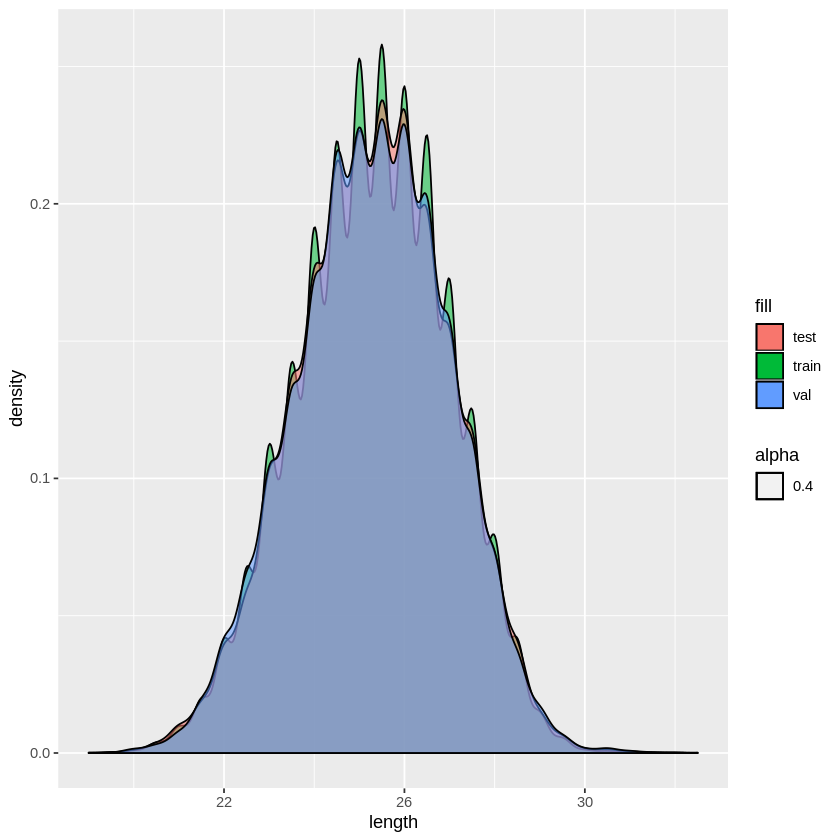

In [16]:
ggplot(mapping=aes(alpha=0.4)) + 
 geom_density(aes(length, fill="train"), train) + 
 geom_density(aes(length, fill="test"), test) + 
 geom_density(aes(length, fill="val"), val)

In [36]:
fit <- train(length ~ .,
             data = train,
             method = "lm")

In [37]:
fit

Linear Regression 

29556 samples
   15 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 29556, 29556, 29556, 29556, 29556, 29556, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  1.327412  0.3498919  1.04892

Tuning parameter 'intercept' was held constant at a value of TRUE

In [21]:
# ggplot(fit) + theme_bw()

In [51]:
regFloatLength <- predict(fit,
                      newdata = test)
regFloatLength

11       14       21       25       28       34       35       37 
25.02229 25.01441 25.01425 25.01415 25.01408 25.01394 25.01392 25.01387 
      38       58       64       67       76       79       80       81 
25.01385 24.99776 24.99761 24.99754 25.02857 25.02850 25.02848 25.02845 
      88       89       92       95      102      106      108      118 
25.00486 25.00483 25.00476 25.03593 24.99672 25.02005 25.02001 25.02758 
     125      130      131      142      146      173      175      179 
25.02742 25.04292 25.04289 25.01921 25.01911 24.99505 24.99500 24.99490 
     180      181      187      191      192      195      197      201 
24.99488 24.99486 25.03376 25.03367 25.03365 25.03358 25.03353 25.03343 
     204      210      212      217      218      219      221      222 
25.03336 25.03322 25.03318 24.97839 24.97837 24.97834 24.97829 24.71896 
     225      233      247      251      253      267      268      273 
24.71889 25.04049 25.00892 25.00883 24.99316 25.02407 25.02405 25.02393 
     285      295      297      298      301      305      306      308 
24.71747 25.11950 24.99212 24.99210 24.99203 24.99193 24.99191 24.99186 
     311      312      313      318      319      320      321      323 
24.99179 24.99177 24.99175 25.03463 25.03461 25.03459 25.03456 25.03451 
     329      331      333      336      354      355      358      363 
25.04218 25.04214 25.04209 25.02244 25.02202 25.02200 25.02193 25.02962 
     371      376      377      378      379      382      386      388 
25.02943 25.02931 25.02929 25.02926 25.02924 25.02917 25.02908 25.02903 
     391      392      395      397      400      401      402      414 
25.02896 25.02893 25.04063 25.04058 25.04051 25.04049 25.04046 25.04799 
     415      423      429      431      434      437      438      439 
25.04797 25.01258 25.01244 24.99678 25.02794 25.02787 25.02785 24.97316 
     442      445      446      447      459      468      473      479 
24.97309 24.97302 24.97299 24.97297 25.01955 25.01933 25.05340 25.04646 
     498      499      500      501      510      515      519      521 
24.99915 24.99913 24.99910 24.99908 25.03396 25.03385 25.03375 25.03370 
     526      527      529      536      545      546      553      555 
25.03359 25.03356 25.03352 24.99430 25.00971 25.00969 25.00952 25.00947 
     561      566      570      573      578      581      583      584 
25.00933 25.00921 25.00912 25.00905 25.04017 25.04010 25.04005 25.04003 
     587      589      590      593      597      598      601      606 
25.03996 25.03991 25.03989 25.03982 25.03972 25.03970 25.03963 25.00442 
     608      610      622      626      631      632      633      636 
25.00437 25.00432 25.01570 25.01561 25.01549 25.01547 25.01544 25.01537 
     637      643      647      652      657      658      661      662 
25.01535 25.03083 25.03073 25.03062 25.03050 25.03048 25.03040 25.03038 
     664      665      671      672      679      687      691      692 
25.03033 25.03031 25.03017 25.01453 25.01436 25.01417 25.01408 25.01405 
     696      711      712      713      714      715      717      721 
25.01396 25.02923 25.02920 25.00575 25.00573 25.00570 25.00566 25.00556 
     728      729      739      740      743      749      752      758 
25.00154 25.00152 25.03252 25.03250 25.03243 25.03229 25.03222 25.03988 
     759      763      765      767      771      776      777      786 
25.03986 25.03977 25.03972 25.03967 25.03958 25.03946 25.03944 24.98778 
     787      788      792      793      794      796      800      802 
25.01182 25.01179 24.70552 24.70550 25.02727 25.02722 24.99984 24.99980 
     811      813      816      819      823      828      829      836 
25.06206 25.06202 25.06195 25.03064 25.06178 25.06166 25.06164 25.03805 
     837      838      842      843      844      846      847      848 
25.03802 25.03800 26.00965 26.00962 26.00960 26.00955 26.00953 26.00951 
     860      862      865      869      872      873      876  

In [52]:
# list(test$length)
#class(regClasses)
length(test$length)
length(regFloatLength)

[1] 13146

[1] 13146

In [54]:
regLength <- round(regFloatLength)
head(regLength)

11 14 21 25 28 34 
25 25 25 25 25 25

In [55]:
confusionMatrix(data = factor(regLength, levels=min(test$length):max(test$length)),
                factor(test$length, levels=min(test$length):max(test$length)))

Confusion Matrix and Statistics

          Reference
Prediction  19  20  21  22  23  24  25  26  27  28  29  30  31  32
        19   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        20   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        21   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        22   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        23   1   0   7  65 134  96  46   9   2   1   0   0   0   0
        24   0   3  14  97 247 295 199  91  16   0   0   0   0   0
        25   0   4  42  84 229 529 691 632 238  53  10   0   1   1
        26   0   0   1   6  48 182 468 645 512 272  50   7   3   0
        27   0   0   1   0   2   8  25 105 184 117  29   2   0   0
        28   0   0   0   0   1   5   3  14  22  13   2   0   0   0
        29   0   0   0   0   0   0   0   0   1   0   0   0   0   0
        30   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        31   0   0   0   0   0   0   0   0   0   0   0   0   0   0
        3

In [56]:
rsq <- function (x, y) cor(x, y) ^ 2

In [57]:
rsq(regFloatLength, test$length)

[1] 0.3499214

In [58]:
rsq(regLength, test$length)

[1] 0.3370408